In [ ]:
MLP different activation Functions

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)


pandas: 2.2.2
numpy: 1.26.4
seaborn: 0.13.2
matplotlib: 3.9.0
scikit-learn: 1.6.1


Relu (Rectified Linear Unit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
Data Information:
------------------------------
Shape: (29531, 16)

Columns:
  - City
  - Date
  - 

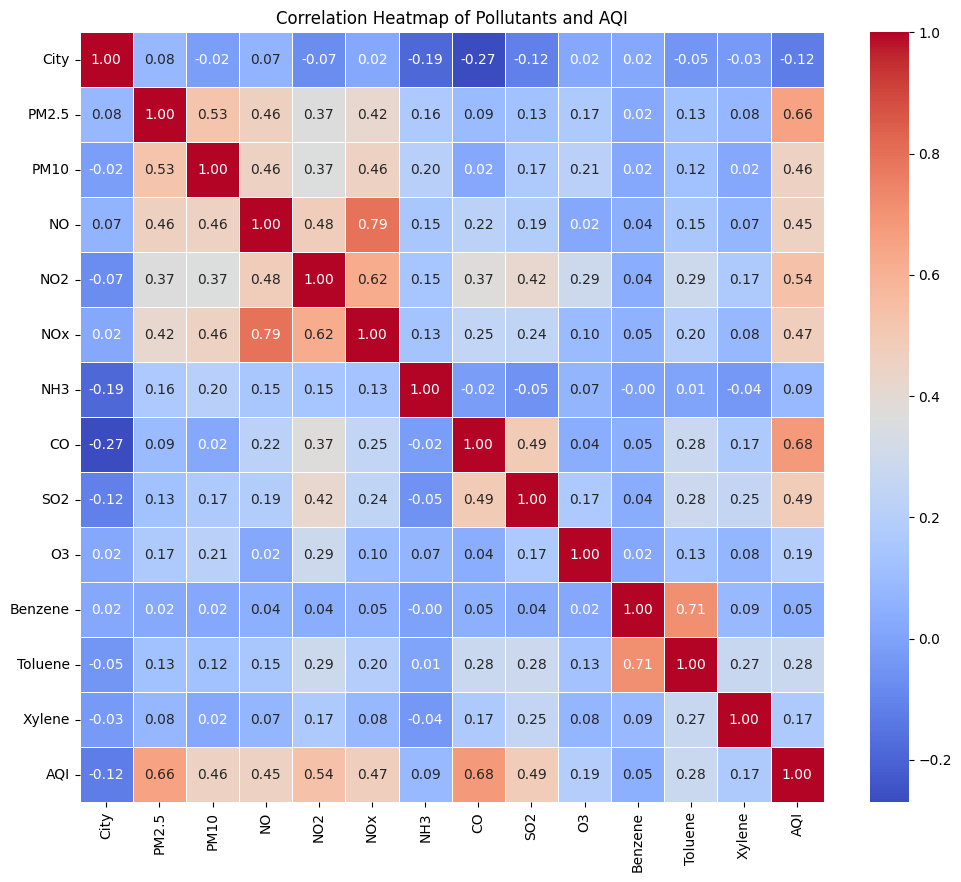

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training Performance:
------------------------------
Mean Absolute Error (Train): 0.13952398694629112
Mean Squared Error (Train): 0.06236880746643137
R-squared (Train): 0.9376311925335686

Mean Absolute Error: 0.16027109817607116
Mean Squared Error: 0.10567135387475332
R-squared (R²) Score: 0.8893407944876044


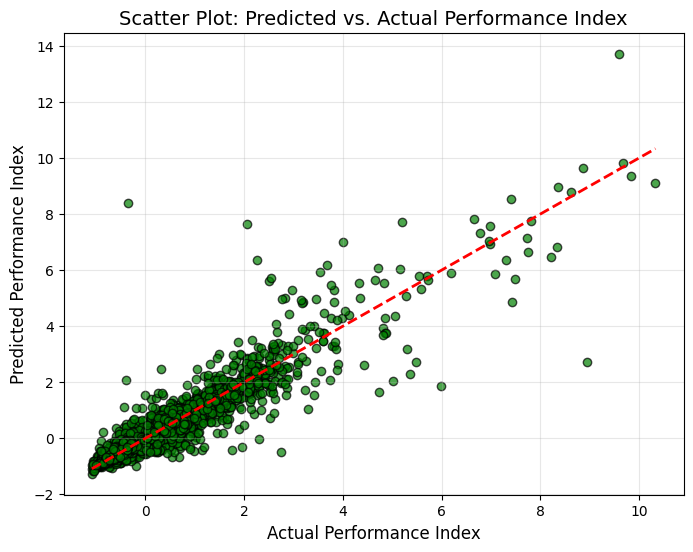

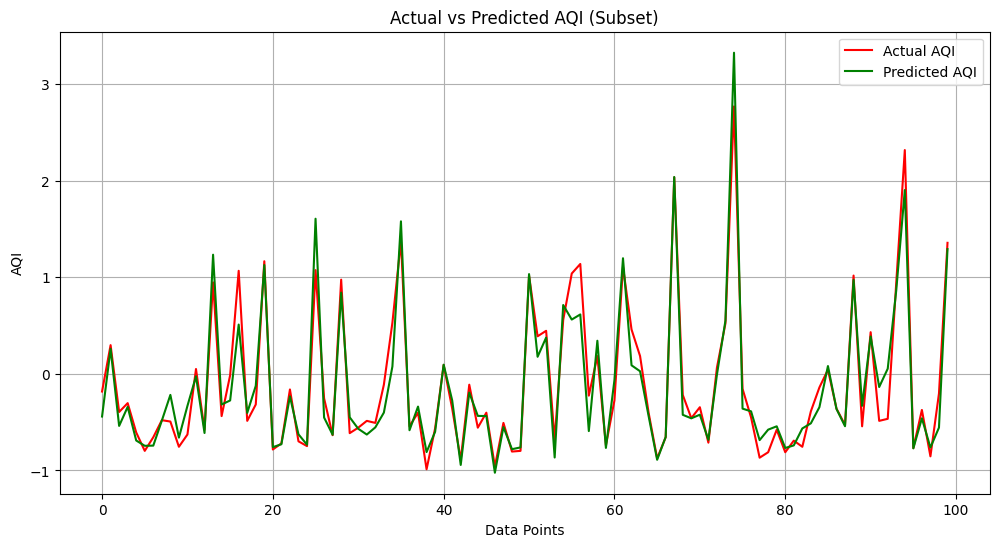

In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

df = pd.read_csv("city_day.csv")

data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}

print("Data Information:")
print("-" * 30)

print(f"Shape: {data_info['shape']}")
print("\nColumns:")
for col in data_info['columns']:
        print(f"  - {col}")

print("\nInfo:")
print(data_info['info'])

print("\nMissing Values:")
print(data_info['missing_values'])

print("\nHead:")
print(data_info['head'])

df = df.dropna(subset="AQI")
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col]=df[col].fillna(df[col].median())
df.isnull().sum()


#using LabelEncoder to use City: a str data column 
df1 = df['City'].unique()
print("\nUnique City Names:")
for name in df1:
        print(f"  - {name}") #lists out all city names
label_encoder = LabelEncoder()
df['City'] = LabelEncoder().fit_transform(df['City']) 

# Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

# Model Training
x = df.drop(columns=["AQI"])
y = df["AQI"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='relu', solver='adam',
                    max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

# Predictions on Training Set
y_train_pred = mlp.predict(x_train)

# Training Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Performance:")
print("-" * 30)
print("Mean Absolute Error (Train):", train_mae)
print("Mean Squared Error (Train):", train_mse)
print("R-squared (Train):", train_r2)


# Evaluation metrics - MAE, MSE and R^2
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2) 
plt.figure(figsize=(8, 6))

# Result Plot
plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Predicted vs. Actual Performance Index", fontsize=14)
plt.xlabel("Actual Performance Index", fontsize=12)
plt.ylabel("Predicted Performance Index", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

subset_size = 100 
points = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred[:subset_size]
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(points, y_test_subset, color='red', label='Actual AQI')
plt.plot(points, y_pred_subset, color='green', label='Predicted AQI')
plt.title("Actual vs Predicted AQI (Subset)")
plt.xlabel("Data Points")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()



Logistic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
Data Information:
------------------------------
Shape: (29531, 16)

Columns:
  - City
  - Date
  - 

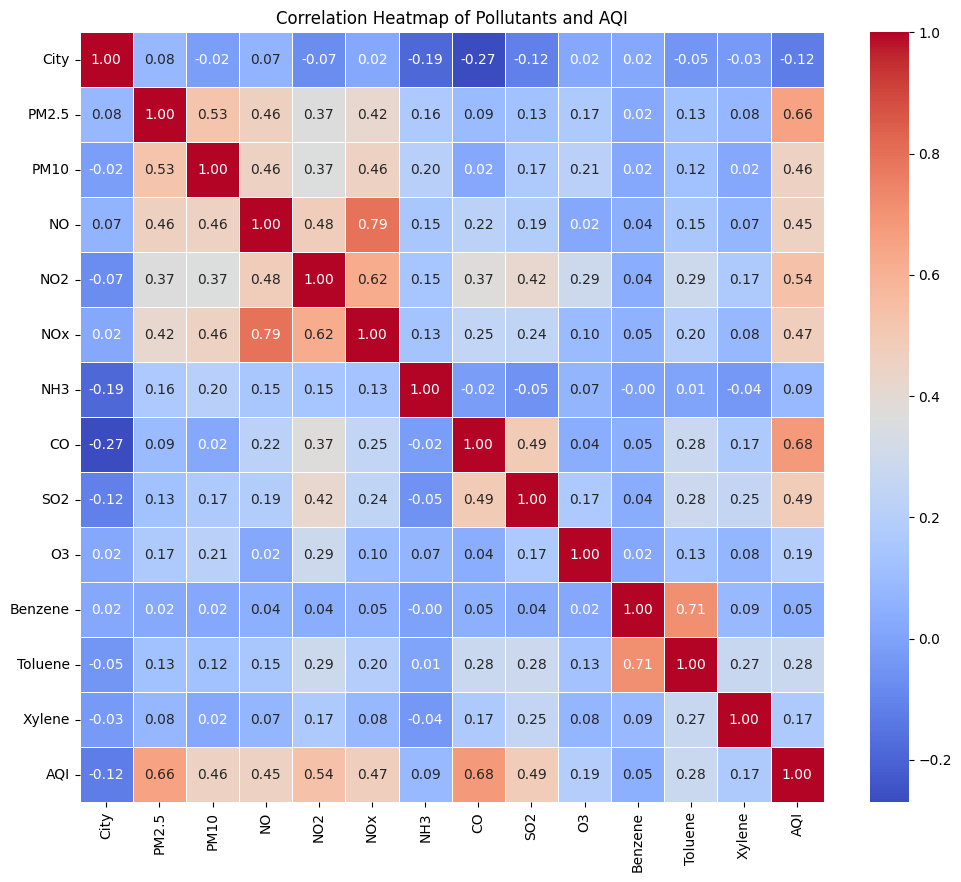

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training Performance:
------------------------------
Mean Absolute Error (Train): 0.15752031010140546
Mean Squared Error (Train): 0.08409385862130617
R-squared (Train): 0.9159061413786939

Mean Absolute Error: 0.16124993656149952
Mean Squared Error: 0.10658939570522047
R-squared (R²) Score: 0.8883794196602596


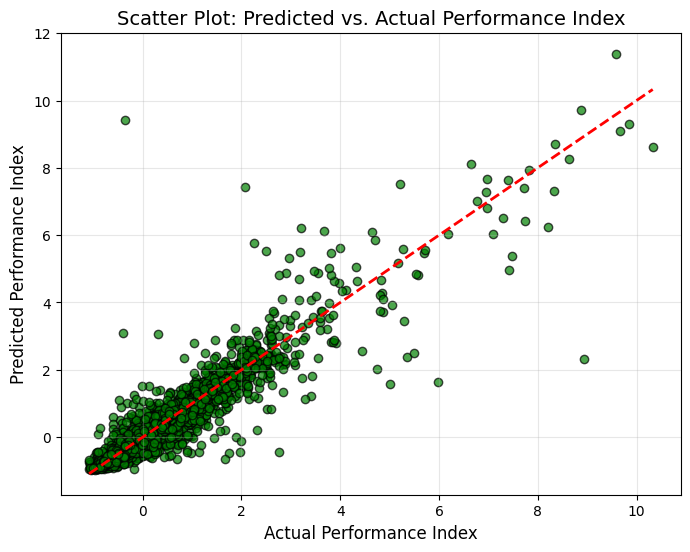

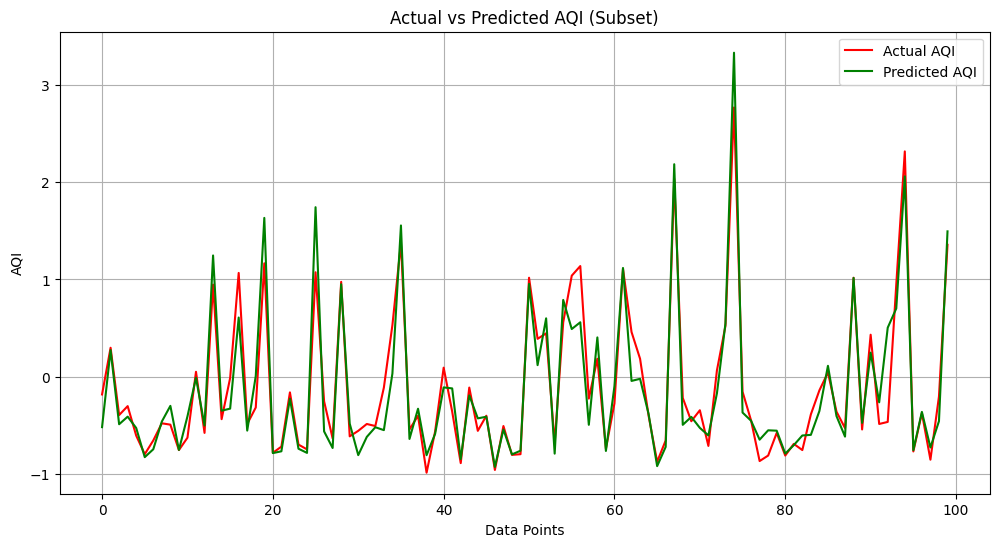

In [2]:
# Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

df = pd.read_csv("city_day.csv")

data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}

print("Data Information:")
print("-" * 30)

print(f"Shape: {data_info['shape']}")
print("\nColumns:")
for col in data_info['columns']:
        print(f"  - {col}")

print("\nInfo:")
print(data_info['info'])

print("\nMissing Values:")
print(data_info['missing_values'])

print("\nHead:")
print(data_info['head'])

df = df.dropna(subset="AQI")
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col]=df[col].fillna(df[col].median())
df.isnull().sum()


#using LabelEncoder to use City: a str data column 
df1 = df['City'].unique()
print("\nUnique City Names:")
for name in df1:
        print(f"  - {name}") #lists out all city names
label_encoder = LabelEncoder()
df['City'] = LabelEncoder().fit_transform(df['City']) 

# Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

# Model Training
x = df.drop(columns=["AQI"])
y = df["AQI"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='logistic', solver='adam',
                    max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

# Predictions on Training Set
y_train_pred = mlp.predict(x_train)

# Training Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Performance:")
print("-" * 30)
print("Mean Absolute Error (Train):", train_mae)
print("Mean Squared Error (Train):", train_mse)
print("R-squared (Train):", train_r2)


# Evaluation metrics - MAE, MSE and R^2
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2) 
plt.figure(figsize=(8, 6))

# Result Plot
plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Predicted vs. Actual Performance Index", fontsize=14)
plt.xlabel("Actual Performance Index", fontsize=12)
plt.ylabel("Predicted Performance Index", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

subset_size = 100 
points = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred[:subset_size]
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(points, y_test_subset, color='red', label='Actual AQI')
plt.plot(points, y_pred_subset, color='green', label='Predicted AQI')
plt.title("Actual vs Predicted AQI (Subset)")
plt.xlabel("Data Points")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()



TanH

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
Data Information:
------------------------------
Shape: (29531, 16)

Columns:
  - City
  - Date
  - 

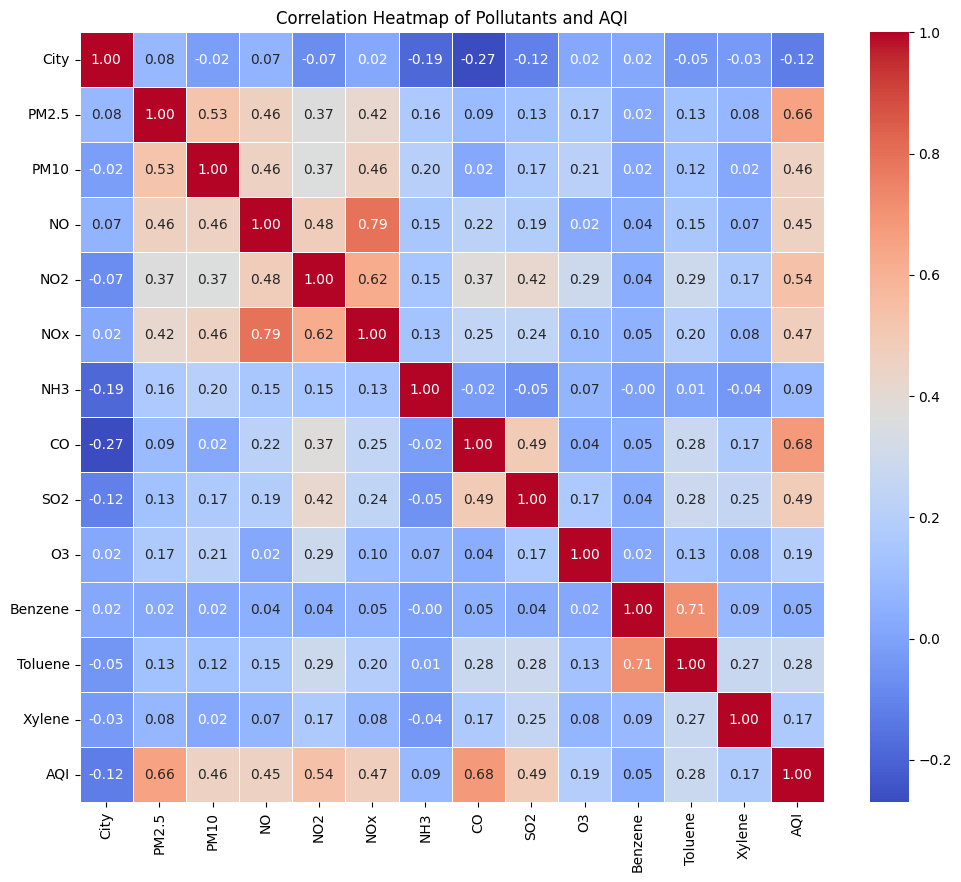

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training Performance:
------------------------------
Mean Absolute Error (Train): 0.15204576981581333
Mean Squared Error (Train): 0.07127444658663991
R-squared (Train): 0.92872555341336

Mean Absolute Error: 0.16508452493982012
Mean Squared Error: 0.10779670404001264
R-squared (R²) Score: 0.8871151245013753


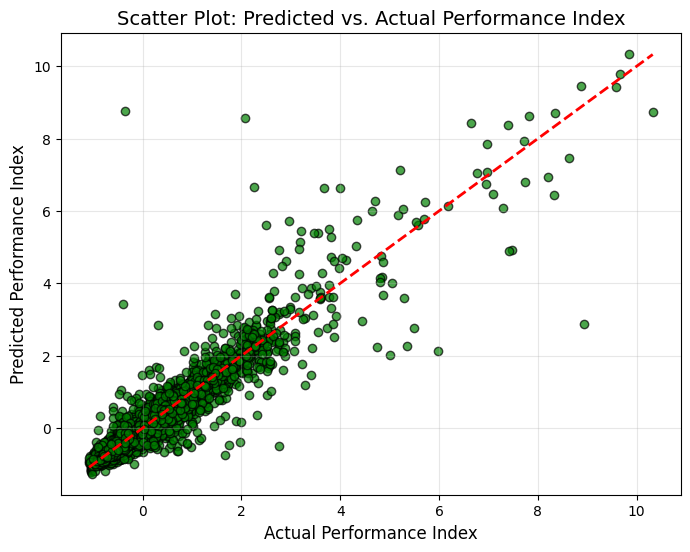

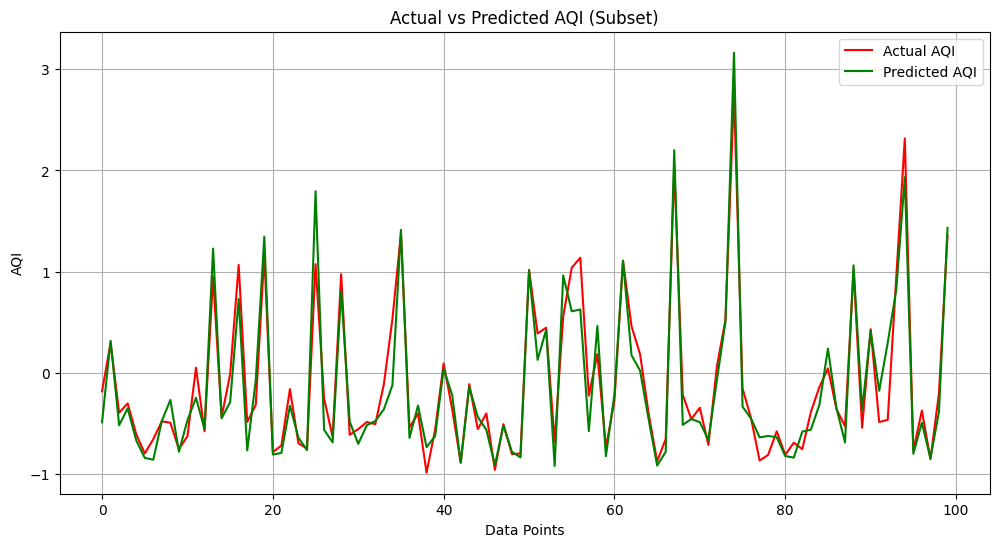

In [3]:
# Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

df = pd.read_csv("city_day.csv")

data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}

print("Data Information:")
print("-" * 30)

print(f"Shape: {data_info['shape']}")
print("\nColumns:")
for col in data_info['columns']:
        print(f"  - {col}")

print("\nInfo:")
print(data_info['info'])

print("\nMissing Values:")
print(data_info['missing_values'])

print("\nHead:")
print(data_info['head'])

df = df.dropna(subset="AQI")
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col]=df[col].fillna(df[col].median())
df.isnull().sum()


#using LabelEncoder to use City: a str data column 
df1 = df['City'].unique()
print("\nUnique City Names:")
for name in df1:
        print(f"  - {name}") #lists out all city names
label_encoder = LabelEncoder()
df['City'] = LabelEncoder().fit_transform(df['City']) 

# Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

# Model Training
x = df.drop(columns=["AQI"])
y = df["AQI"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='tanh', solver='adam',
                    max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

# Predictions on Training Set
y_train_pred = mlp.predict(x_train)

# Training Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Performance:")
print("-" * 30)
print("Mean Absolute Error (Train):", train_mae)
print("Mean Squared Error (Train):", train_mse)
print("R-squared (Train):", train_r2)


# Evaluation metrics - MAE, MSE and R^2
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2) 
plt.figure(figsize=(8, 6))

# Result Plot
plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Predicted vs. Actual Performance Index", fontsize=14)
plt.xlabel("Actual Performance Index", fontsize=12)
plt.ylabel("Predicted Performance Index", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

subset_size = 100 
points = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred[:subset_size]
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(points, y_test_subset, color='red', label='Actual AQI')
plt.plot(points, y_pred_subset, color='green', label='Predicted AQI')
plt.title("Actual vs Predicted AQI (Subset)")
plt.xlabel("Data Points")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()



Identity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
Data Information:
------------------------------
Shape: (29531, 16)

Columns:
  - City
  - Date
  - 

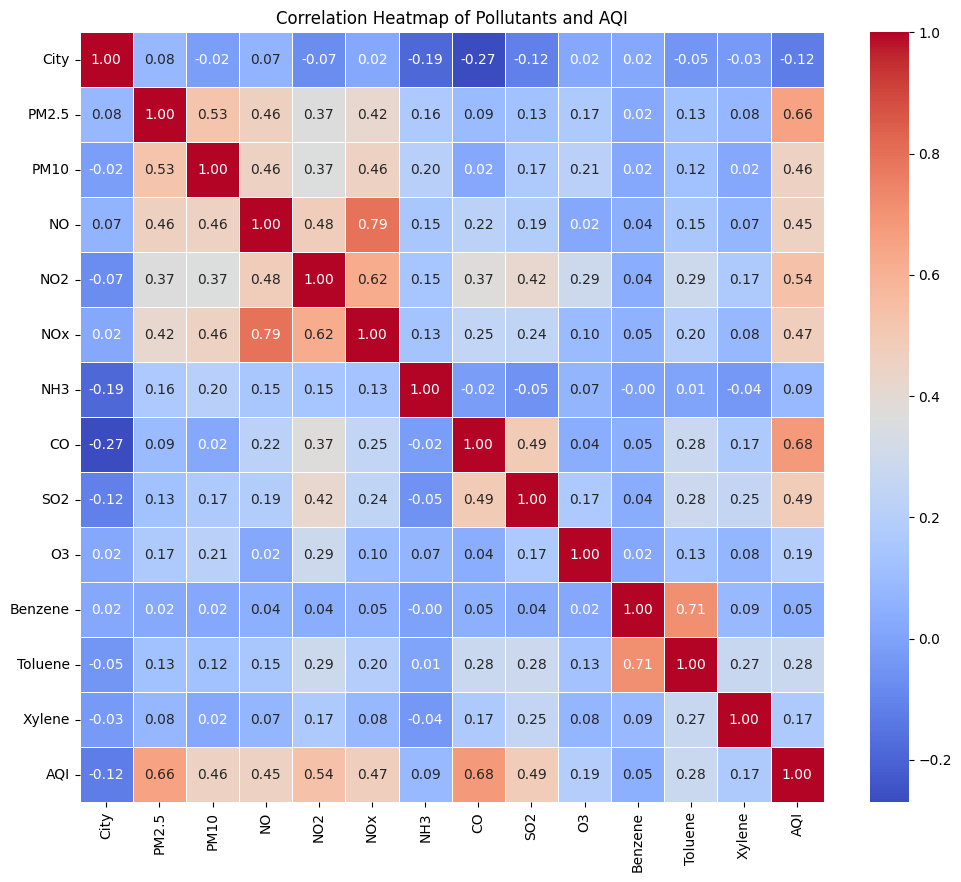

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training Performance:
------------------------------
Mean Absolute Error (Train): 0.21106642845639778
Mean Squared Error (Train): 0.14091890190976772
R-squared (Train): 0.8590810980902324

Mean Absolute Error: 0.22052201594215642
Mean Squared Error: 0.19078105778954846
R-squared (R²) Score: 0.8002137806729682


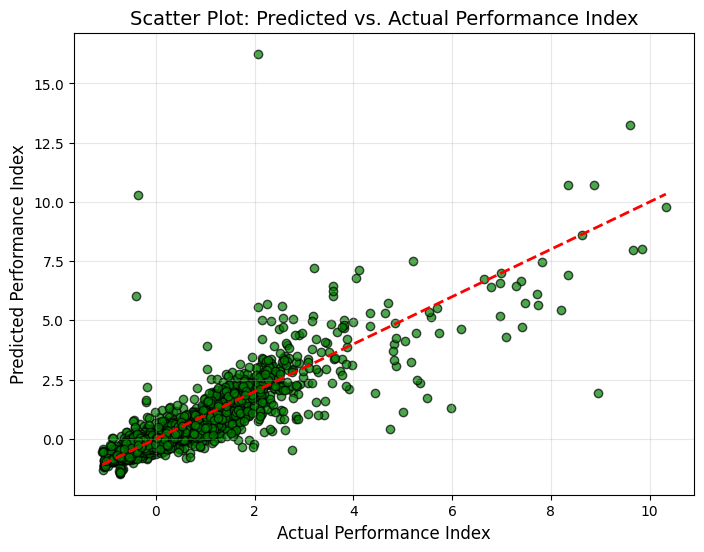

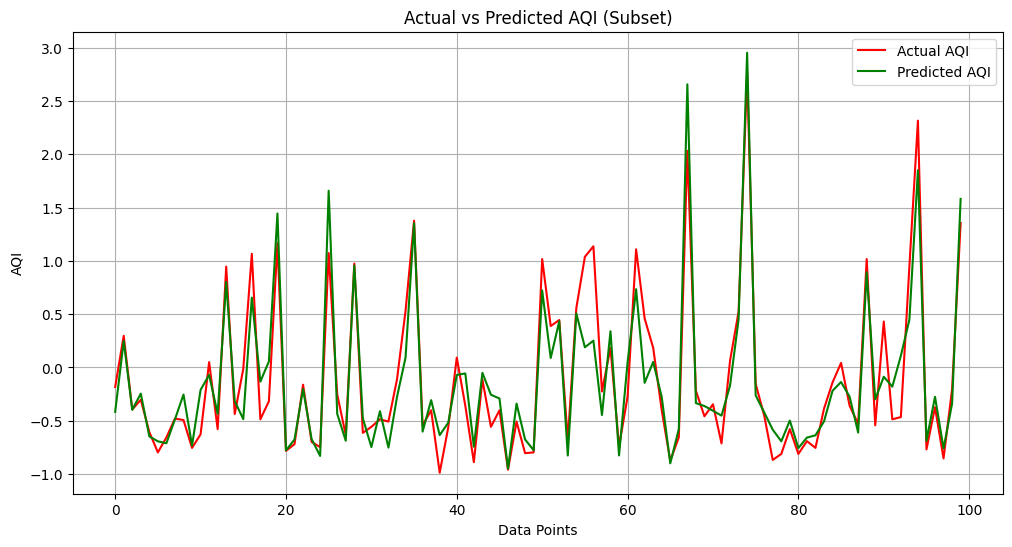

In [5]:
# Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

df = pd.read_csv("city_day.csv")

data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}

print("Data Information:")
print("-" * 30)

print(f"Shape: {data_info['shape']}")
print("\nColumns:")
for col in data_info['columns']:
        print(f"  - {col}")

print("\nInfo:")
print(data_info['info'])

print("\nMissing Values:")
print(data_info['missing_values'])

print("\nHead:")
print(data_info['head'])

df = df.dropna(subset="AQI")
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col]=df[col].fillna(df[col].median())
df.isnull().sum()


#using LabelEncoder to use City: a str data column 
df1 = df['City'].unique()
print("\nUnique City Names:")
for name in df1:
        print(f"  - {name}") #lists out all city names
label_encoder = LabelEncoder()
df['City'] = LabelEncoder().fit_transform(df['City']) 

# Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

# Model Training
x = df.drop(columns=["AQI"])
y = df["AQI"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

mlp = MLPRegressor(hidden_layer_sizes=(64, 32),
                   activation='identity', solver='adam',
                    max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

# Predictions on Training Set
y_train_pred = mlp.predict(x_train)

# Training Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Performance:")
print("-" * 30)
print("Mean Absolute Error (Train):", train_mae)
print("Mean Squared Error (Train):", train_mse)
print("R-squared (Train):", train_r2)


# Evaluation metrics - MAE, MSE and R^2
mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2) 
plt.figure(figsize=(8, 6))

# Result Plot
plt.scatter(y_test, y_pred, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Predicted vs. Actual Performance Index", fontsize=14)
plt.xlabel("Actual Performance Index", fontsize=12)
plt.ylabel("Predicted Performance Index", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

subset_size = 100 
points = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred[:subset_size]
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(points, y_test_subset, color='red', label='Actual AQI')
plt.plot(points, y_pred_subset, color='green', label='Predicted AQI')
plt.title("Actual vs Predicted AQI (Subset)")
plt.xlabel("Data Points")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()

